In [16]:
import pandas as pd
from pathlib import Path
import os


def generate_kernel_stats_table(dataset_paths):
    # Lista de versões correspondentes aos datasets
    versions = ["4.13", "4.15", "4.20", "5.0", "5.4", "5.7", "5.8"]

    # Valores de tempo médio fornecidos na tabela (em segundos)
    avg_times = {
        "4.13": 271,
        "4.15": 263,
        "4.20": 225,
        "5.0": 225,
        "5.4": 235,
        "5.7": 235,
        "5.8": 235
    }

    # Lista para armazenar os dados da tabela
    table_data = []

    # Alvos (targets) conhecidos do relatório
    known_targets = ["vmlinux", "GZIP-bzImage", "GZIP-vmlinux", "BZIP2-bzImage", "BZIP2-vmlinux",
                     "LZMA-bzImage", "LZMA-vmlinux", "XZ-vmlinux", "bzImage"]

    for version, dataset_path in zip(versions, dataset_paths):
        # Carregar o dataset
        df = pd.read_pickle(dataset_path)

        # Converter os valores de tamanho de bytes para MB (1 MB = 1024 * 1024 bytes)
        for target in known_targets:
            if target in df.columns:
                df[target] = df[target] / (1024 * 1024)

        # Número de configurações (linhas)
        num_configs = len(df)

        # Número de opções (colunas que não são alvos)
        #option_columns = [col for col in df.columns if col not in known_targets] 
        option_columns = [col for col in df.columns]
        num_options = len(option_columns)

        #known_targets = ["vmlinux", "GZIP-bzImage", "GZIP-vmlinux", "BZIP2-bzImage", "BZIP2-vmlinux",
        #                 "LZMA-bzImage", "LZMA-vmlinux", "XZ-vmlinux", "bzImage"]

        # Tamanho mínimo e máximo do GZIP-bzImage (em MB)
        min_size = df["vmlinux"].min()
        max_size = df["vmlinux"].max()
        min_max_size = f"{min_size:.1f} - {max_size:.1f}"

        # Tempo médio (usando os valores fornecidos na tabela)
        avg_time = avg_times[version]
        print

        # Adicionar os dados à tabela
        table_data.append({
            "Version": version,
            "Options": f"{num_options:,}",
            "Configurations": f"{num_configs:,}",
            "Min/Max Size (MB)": min_max_size,
            #"Avg Time(s)": avg_time
        })

    # Criar a tabela em formato Markdown
    #table = "| Version | Options | Configurations | Min/Max Size (MB) | Avg Time(s) |\n"
    table = "| Version | Options | Configurations | Min/Max Size (MB) |\n"
    #table += "|---------|---------|----------------|-------------------|-------------|\n"
    table += "|---------|---------|----------------|-------------------|\n"
    for row in table_data:
        #table += f"| {row['Version']} | {row['Options']} | {row['Configurations']} | {row['Min/Max Size (MB)']} | {row['Avg Time(s)']} |\n"
        table += f"| {row['Version']} | {row['Options']} | {row['Configurations']} | {row['Min/Max Size (MB)']} |\n"

    return table

In [18]:
dataset_paths = [
    "dataset_413.pkl",
    "dataset_415.pkl",
    "dataset_420.pkl",
    "dataset_500.pkl",  
    "dataset_504.pkl",
    "dataset_507.pkl",
    "dataset_508.pkl"
]

table = generate_kernel_stats_table(dataset_paths)
print(table)

| Version | Options | Configurations | Min/Max Size (MB) |
|---------|---------|----------------|-------------------|
| 4.13 | 12,502 | 92,471 | 7.0 - 1698.1 |
| 4.15 | 9,445 | 39,391 | 11.0 - 1783.8 |
| 4.20 | 10,209 | 23,489 | 11.0 - 2035.5 |
| 5.0 | 10,313 | 19,952 | 11.0 - 1869.5 |
| 5.4 | 10,833 | 25,847 | 11.1 - 1959.4 |
| 5.7 | 11,358 | 20,159 | 11.1 - 1906.0 |
| 5.8 | 11,550 | 21,923 | 11.1 - 1905.1 |



BOXPLOT 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def generate_binary_size_boxplot(dataset_paths, output_image_path="tuxkconfig_boxplot.png"):
    """
    Generate a boxplot of the binary size distribution (MB) for the vmlinux target
    across Linux kernel versions 4.13 to 5.8, similar to the provided figure.
    
    Parameters:
    - dataset_paths (list): List of paths to the dataset files (.pkl format).
    - output_image_path (str): Path to save the generated boxplot image (default: 'tuxkconfig_boxplot.png').
    
    Returns:
    - Displays the boxplot in the notebook and saves it as an image.
    """
    # Define the versions corresponding to the datasets
    versions = ["4.13", "4.15", "4.20", "5.0", "5.4", "5.7", "5.8"]
        
    all_data = []
    
    # Load each dataset and extract the vmlinux sizes
    for version, dataset_path in zip(versions, dataset_paths):
        df = pd.read_pickle(dataset_path)
        
        # Convert vmlinux sizes from bytes to MB (1 MB = 1024 * 1024 bytes)
        df["vmlinux"] = df["vmlinux"] / (1024 * 1024)
        df["Version"] = version
        
        # Append the vmlinux sizes and version to the combined data
        all_data.append(df[["Version", "vmlinux"]])
    
    
    combined_df = pd.concat(all_data, ignore_index=True)
    
    plt.figure(figsize=(8, 6))
    
    # Generate the boxplot using seaborn
    sns.boxplot(x="Version", y="vmlinux", data=combined_df, color="lightgray", 
                medianprops={"color": "orange", "linewidth": 2}, 
                flierprops={"marker": "o", "markersize": 5, "markerfacecolor": "black", "markeredgecolor": "black"})
    
    # Customize the plot
    plt.title("Boxplot of binary size distribution (MB) across versions 4.13 to 5.8.", fontsize=12, pad=15)
    plt.xlabel("Kernel Version", fontsize=10)
    plt.ylabel("Binary Size (MB)", fontsize=10)
    
    plt.ylim(0, 2000)
    plt.tight_layout()
    plt.savefig(output_image_path, dpi=300, bbox_inches="tight") #save     
    
    plt.show()
    plt.close()

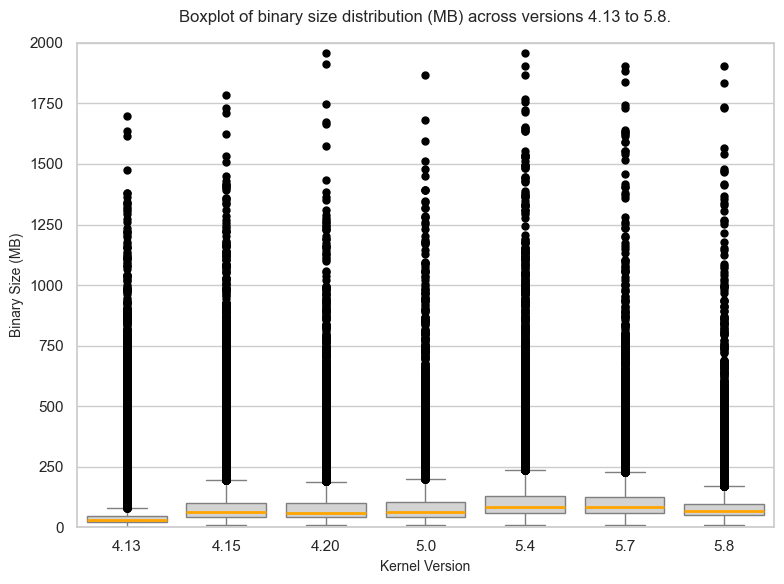

In [13]:
# List of paths to the datasets
dataset_paths = [
    "dataset_413.pkl",
    "dataset_415.pkl",
    "dataset_420.pkl",
    "dataset_500.pkl",
    "dataset_504.pkl",
    "dataset_507.pkl",
    "dataset_508.pkl"
]

# Generate and display the boxplot
generate_binary_size_boxplot(dataset_paths)

MAPE 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# known targets to exclude from training features
known_targets = ["vmlinux", "GZIP-bzImage", "GZIP-vmlinux", "BZIP2-bzImage", "BZIP2-vmlinux", 
                 "LZMA-bzImage", "LZMA-vmlinux", "XZ-vmlinux", "bzImage"]

dataset = pd.read_pickle("dataset_415.pkl")

# Convert vmlinux sizes from bytes to MB 
dataset["vmlinux"] = dataset["vmlinux"] / (1024 * 1024)

# Separate features (configuration options) and target (vmlinux size in MB)
# Exclude known targets from the features
X = dataset.drop(columns=known_targets, errors="ignore")
y = dataset["vmlinux"]

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

# Print the MAPE - MAPE: 57.29%
print(f"MAPE: {mape:.2f}%")